In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import gc
import os 
import fpfs
import galsim
import numpy as np
import matplotlib.pylab as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

In [2]:
scale = 0.168
seeing = 0.6
rcut = 32
psfInt = galsim.Moffat(
    beta=3.5, fwhm=seeing, trunc=seeing * 4.0
).shear(e1=0.02, e2=-0.02)
psf_data = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=64, ny=64, scale=scale).array

In [3]:
noise_fname = os.path.join(fpfs.__data_dir__, 'noiPows3.npy')
noi_var = 7e-3
noise_pow = (
    np.load(noise_fname, allow_pickle=True).item()["%s" % rcut]
    * noi_var
    * 100
)

In [4]:
cat_fname = os.path.join(fpfs.__data_dir__, 'fpfs-cut32-0000-g1-0000.fits')
mms = pyfits.getdata(cat_fname)

In [5]:
noise_task = fpfs.image.measure_noise_cov(
    psf_data,
    nnord=4,
    sigma_arcsec=0.45,
)
cov_mat = noise_task.measure(noise_pow)

cov_mat2 = fpfs.catalog.fpfscov_to_imptcov(mms)
for elem1, elem2 in zip(cov_mat.flatten(), cov_mat2.flatten()):
    if elem2 != 0.0:
        np.testing.assert_array_almost_equal(
            elem1,
            elem2,
        )

2023/03/05 04:03:05 ---  Gaussian kernel in configuration space: sigma= 0.4500 arcsec


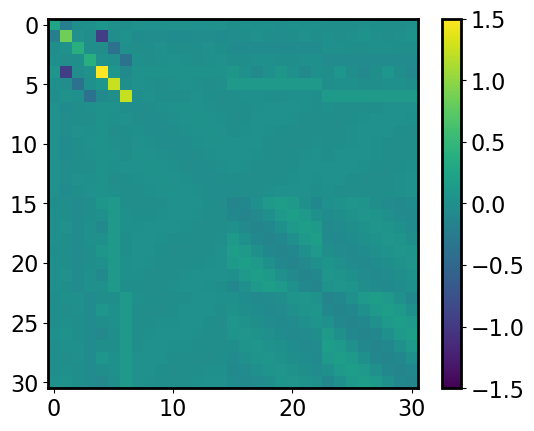

In [6]:
plt.close()
plt.imshow(cov_mat,vmin=-1.5,vmax=1.5)
plt.colorbar()
#fitsio.write('modes_cov_mat_paper3_045.fits')

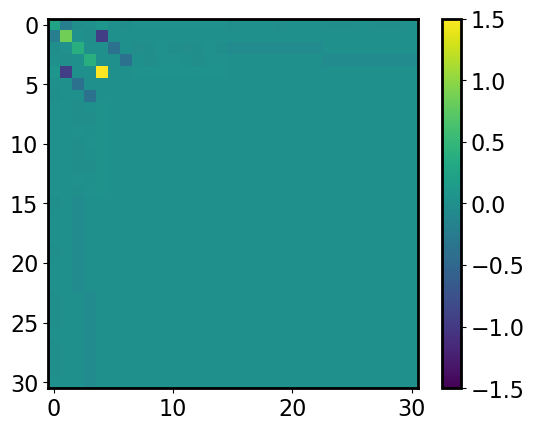

In [7]:
plt.close()
plt.imshow(cov_mat2,vmin=-1.5,vmax=1.5)
plt.colorbar()
#fitsio.write('modes_cov_mat_approx_paper3_045.fits')